In [79]:
import numpy as np
import pylab as pl 
from scipy.optimize import curve_fit


# I/O with python 

Most of the files, where data are stored,  are usually in ASCII formats like `.txt, .dat, .csv`. It is sometime useful to run data analysis routines as the ones seen during the [previous class](https://github.com/giuspugl/lab3_notebooks/blob/main/lesson_0.ipynb). 

Firstly, let's see how to import into python a Spreadsheet (saved in the format `.xlsx`  made with  Excel, Numbers or Google Spreadsheets,etc... ).  


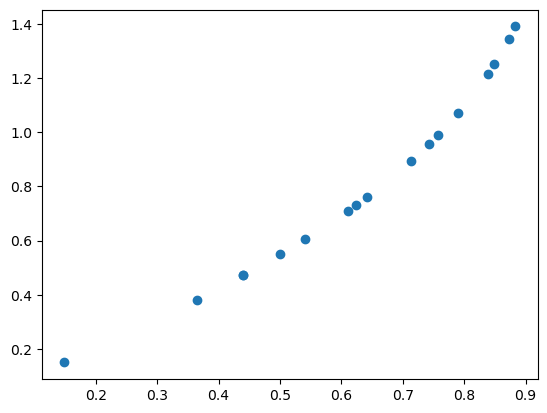

In [80]:
mydata= np.loadtxt('data/mydata.csv',delimiter=',', usecols=[0,1] ) 
x,y= mydata[ :,0 ], mydata[:,1] 
pl.scatter(x,y) 

Now let's try  to read from disc files that have been acquired within  MCA  format. Let's have a look at the energy spectrum of Cobalt counts that you might have acquired during the previous lab3 experiences.

- if you open the file you see there are 12 rows of text that we can surely skip
- in total 2048 channels
- we don't care about the last part of the file ...


We can use the very same numpy function `loadtxt` by inserting the infos we 've listed above. Then we can simply plot what we've read. 


Text(0, 0.5, 'Counts')

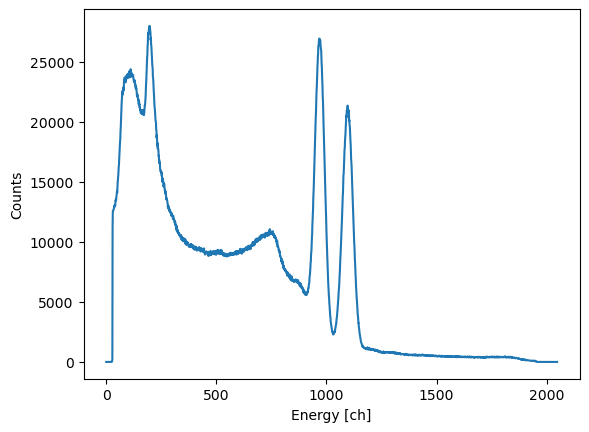

In [81]:
counts= np.loadtxt("data/cobalto.Spe", skiprows=12,  max_rows=2048 ) 
en_chan= np.arange(counts.shape[0]) 
pl.plot(en_chan, counts) 
pl.xlabel("Energy [ch]")
pl.ylabel("Counts")

Text(0, 0.5, 'Counts')

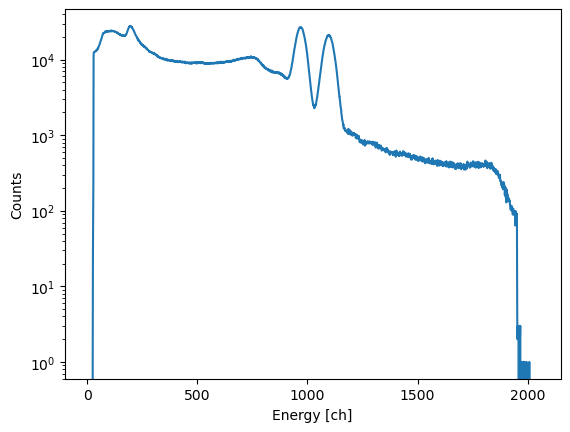

In [82]:
pl.semilogy (en_chan, counts) # you can try also loglog and semilogx for other options 
pl.xlabel("Energy [ch]")
pl.ylabel("Counts")

In [116]:
# Errors
error_en = np.full_like(en_chan, 0.5)  # flat error of  ±0.5 
error_counts = np.sqrt(counts)  # Poisson error (√y), 
error_counts[error_counts == 0] = 1  # if zero counts , error is set to 1

### zooming around some features 
let's zoom around the two peaks about the 1000th channel 

Text(0, 0.5, 'Counts')

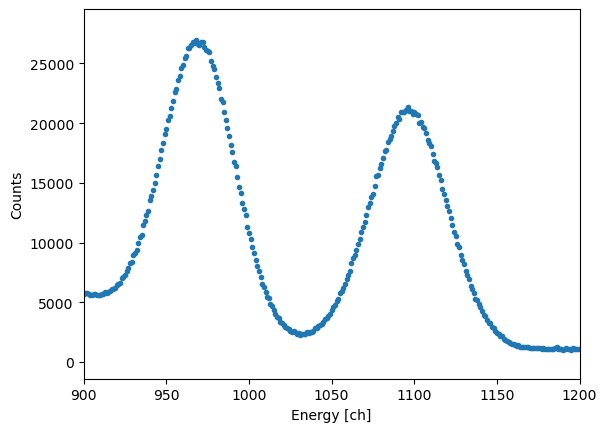

In [117]:
pl.errorbar(en_chan , counts,  yerr=error_counts , xerr=error_en, fmt='.'  )
pl.xlim(900 , 1200) 
pl.xlabel("Energy [ch]")
pl.ylabel("Counts")

## Fitting a gaussian 

We aim at estimating  the location of the peaks and the width of the two curves with a bestfit of a gaussian . 
Note that the two curves are pretty much well approximated by a double gaussian function. 

# Exercise
implement the following function in python , parametrized as follows: 
$$
F(x; A_1, \mu_1, \sigma_1, A_2, \mu_2, \sigma_2) 
$$


In [118]:
### write your code here 
#.... 


#  Gaussian function
gaussian = lambda x,A ,  mu,sigma: A* np.exp(-(x-mu)**2/2/(sigma**2 ))



def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return gaussian(x, A1, mu1, sigma1) + gaussian(x, A2, mu2, sigma2)



## Identifying the range of channels where to perform the fit
1. Once you've defined the function to be fit, we need to identify the range in energy channels where is meaningful to approximate our counts as two gaussians. 
2. You can start by setting a mask all the channels between 900 and 1200 , i.e. : 
```
mask = (en_chan >= 900) & (en_chan <= 1200)
```
3.  call `curve_fit` to perform the fit as in the previous class. something similar to this line should be used: 
```
curve_fit(double_gaussian, en_chan[mask], counts[mask], sigma=error_counts[mask], 
                       p0=[25000, 970, 40, 20000, 1050, 40], absolute_sigma=True)
``` 
4. we can finally plot the data against the fitted curve and also check the quality of the fit. As a figure of merit for this  we could use the $\chi^2$ or the reduced $\tilde{\chi}^2= \chi^2/(N_{obs} - N_{params})$.
5. You can either print $\tilde{\chi}^2$  value  or show it in the legenda of the plot.
6. if you 're not satisfied by the results, re-iterate over the steps above to improve the fit. 

In [119]:
#  chi2 
def chi_squared(y_obs, y_exp, errors):
    return np.sum(((y_obs - y_exp) / errors) ** 2)
# reduced chi2 
def red_chi_squared(y_obs, y_exp, errors, n_params):
    return np.sum(((y_obs - y_exp) / errors) ** 2) /(y_obs.size -n_params -1) 

4689.5431038445495


/var/folders/2y/7mtx094j2tb45h4cj42hcw8w0000gn/T/ipykernel_14748/4120580063.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(double_gaussian, en_chan[mask], counts[mask], sigma=error_counts[mask],


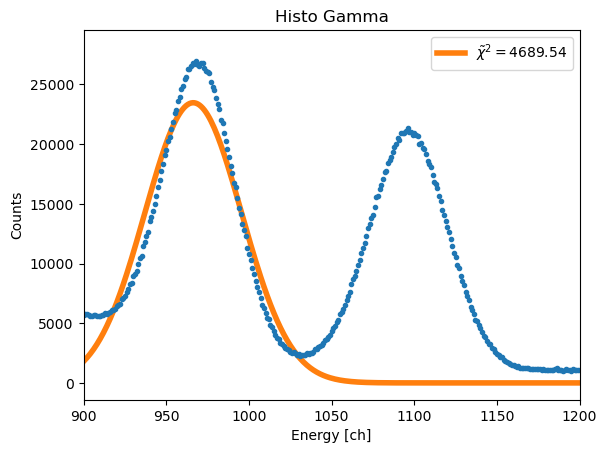

In [124]:
pl.errorbar(en_chan , counts,  yerr=error_counts , xerr=error_en, fmt='.'  )

pl.xlabel("Energy [ch]")
pl.ylabel("Counts")
pl.title("Histo Gamma")
pl.xlim(900,1200 )
# Fit con doppia gaussiana
mask = (en_chan >= 900) & (en_chan <= 1200)
popt, pcov = curve_fit(double_gaussian, en_chan[mask], counts[mask], sigma=error_counts[mask], 
                       p0=[25000, 970, 40, 20000, 1050, 40], absolute_sigma=True)
counts_fit = double_gaussian(en_chan[mask], *popt)
# Calcolo del chi2
chi2 = chi_squared(counts[mask], counts_fit, error_counts[mask])
print(red_chi_squared(counts[mask], counts_fit, error_counts[mask], n_params=6 )) 
redchi2 = red_chi_squared(counts[mask], counts_fit, error_counts[mask], n_params=6 )
pl.plot(en_chan[mask], counts_fit, lw=4,  label=r"$\tilde{\chi}^2=$"+f"{redchi2:.2f}")
pl.legend() 